In [126]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [127]:
from datetime import datetime

In [128]:
df_consultas = pd.read_csv('consultas.csv', sep = ',')
df_avaliacoes = pd.read_csv('avaliacoes.csv', sep = ',')
df_clinicas = pd.read_csv('clinicas.csv', sep = ',')
df_medicos = pd.read_csv('medicos.csv', sep = ',')
df_pacientes = pd.read_csv('pacientes.csv', sep = ',')

In [129]:
df_consultas.head()

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status
0,1,82,15,4,Cardiologia,2023-09-27 23:46,2023-09-28 00:16,Realizada
1,2,18,95,14,Cardiologia,2023-09-04 09:05,2023-09-04 13:05,Realizada
2,3,55,5,4,Pediatria,2023-02-04 02:43,2023-02-04 02:58,Realizada
3,4,78,4,72,Ortopedia,2023-03-14 09:28,2023-03-14 13:28,Realizada
4,5,58,76,36,Pediatria,2023-10-22 16:54,2023-10-22 16:54,Cancelada


In [130]:
df_consultas['data_hora_agendada'] = pd.to_datetime(df_consultas['data_hora_agendada'])
df_consultas['data_hora_inicio'] = pd.to_datetime(df_consultas['data_hora_inicio'])

In [131]:
#cardiologia = df_consultas.loc(df_consultas['especialidade'] == 'Cardiologia')

In [132]:
df_consultas['tempo_espera'] = (df_consultas['data_hora_inicio'] - df_consultas['data_hora_agendada']).dt.total_seconds() / 60 


In [133]:
df_consultas.head()

,id_consulta,id_paciente,id_medico,id_clinica,especialidade,data_hora_agendada,data_hora_inicio,status,tempo_espera
0,1,82,15,4,Cardiologia,2023-09-27 23:46:00,2023-09-28 00:16:00,Realizada,30.0
1,2,18,95,14,Cardiologia,2023-09-04 09:05:00,2023-09-04 13:05:00,Realizada,240.0
2,3,55,5,4,Pediatria,2023-02-04 02:43:00,2023-02-04 02:58:00,Realizada,15.0
3,4,78,4,72,Ortopedia,2023-03-14 09:28:00,2023-03-14 13:28:00,Realizada,240.0
4,5,58,76,36,Pediatria,2023-10-22 16:54:00,2023-10-22 16:54:00,Cancelada,0.0


In [134]:
def tendencia_central (a):
        # Calculo das medidas de tendencias centrais            
    media_consulta = np.mean(a)
    mediana_consulta= np.median(a)
    distancia_consulta = ((media_consulta - mediana_consulta)/mediana_consulta)*100
    print(f"Média: {media_consulta:.2f}\nMediana: {mediana_consulta:.2f}\nDistancia: {distancia_consulta:.2f}% ")
    return media_consulta, mediana_consulta, distancia_consulta

def outliers (b):
        # determinando os quartis
    q1, q2, q3= np.percentile(b , [25, 50, 75])
    iqr = q3 - q1
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr)
    outlier_lista = [x for x in b if x < limite_inferior or x > limite_superior]           
    print(f"Quartis\nQ1: {q1:.2f}\nQ2: {q2:.2f}\nQ3: {q3:.2f}\nValores de corte:\nLimite superior: {limite_superior:.2f}\nLimite inferior: {limite_inferior:.2f}")
    return outlier_lista, limite_inferior, limite_superior, q1, q3

In [135]:
### CLINICAS ###

In [136]:
df_consultas_clinicas = pd.merge(df_consultas, df_clinicas, on='id_clinica', how='inner').reset_index()

In [137]:
df_consultas_medicos = pd.merge(df_consultas, df_medicos, on='id_medico', how='inner').reset_index()

In [138]:
df_clinica_avaliacao = pd.merge(df_consultas_clinicas, df_avaliacoes, on='id_consulta', how='inner')

In [139]:
df_consultas_clinicas.groupby('nome')['tempo_espera'].mean().sort_values(ascending=False).reset_index()

,nome,tempo_espera
0,Clínica Horizonte,103.158585
1,Clínica Nova Vida,98.366446
2,Clínica São Lucas,97.756233
3,Clínica Vital,95.569343
4,Clínica Bem Estar,94.211409
5,Clínica Renova,94.027149
6,Bem Viver,93.152174
7,Saúde Total,92.085366
8,Clínica Esperança,91.952160
9,Vida Plena,89.847973


In [140]:
# Clínica Horizonte
clinica = df_consultas.loc[df_consultas_clinicas['nome'] == 'Clínica Horizonte']
tendencia_central(clinica['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(clinica['tempo_espera']))

Média: 103.16
Mediana: 60.00
Distancia: 71.93% 
Quartis
Q1: 10.00
Q2: 60.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [141]:
# Clínica Nova Vida 
clinica = df_consultas.loc[df_consultas_clinicas['nome'] == 'Clínica Nova Vida']
tendencia_central(clinica['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(clinica['tempo_espera']))

Média: 98.37
Mediana: 60.00
Distancia: 63.94% 
Quartis
Q1: 10.00
Q2: 60.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [142]:
# Clínica São Lucas 
clinica = df_consultas.loc[df_consultas_clinicas['nome'] == 'Clínica São Lucas']
tendencia_central(clinica['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(clinica['tempo_espera']))

Média: 97.76
Mediana: 30.00
Distancia: 225.85% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [143]:
# Clínica Vital 
clinica = df_consultas.loc[df_consultas_clinicas['nome'] == 'Clínica Vital']
tendencia_central(clinica['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(clinica['tempo_espera']))

Média: 95.57
Mediana: 60.00
Distancia: 59.28% 
Quartis
Q1: 10.00
Q2: 60.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [144]:
# Clínica Bem Estar 
clinica = df_consultas.loc[df_consultas_clinicas['nome'] == 'Clínica Bem Estar']
tendencia_central(clinica['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(clinica['tempo_espera']))

Média: 94.21
Mediana: 30.00
Distancia: 214.04% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [145]:
# Bem Viver 
clinica = df_consultas.loc[df_consultas_clinicas['nome'] == 'Bem Viver']
tendencia_central(clinica['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(clinica['tempo_espera']))

Média: 93.15
Mediana: 60.00
Distancia: 55.25% 
Quartis
Q1: 10.00
Q2: 60.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [146]:
# Saúde Total 
clinica = df_consultas.loc[df_consultas_clinicas['nome'] == 'Saúde Total']
tendencia_central(clinica['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(clinica['tempo_espera']))

Média: 92.09
Mediana: 30.00
Distancia: 206.95% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [147]:
# Clínica Esperança 
clinica = df_consultas.loc[df_consultas_clinicas['nome'] == 'Clínica Esperança']
tendencia_central(clinica['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(clinica['tempo_espera']))

Média: 91.95
Mediana: 30.00
Distancia: 206.51% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [148]:
# Vida Plena 
clinica = df_consultas.loc[df_consultas_clinicas['nome'] == 'Vida Plena']
tendencia_central(clinica['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(clinica['tempo_espera']))

Média: 89.85
Mediana: 30.00
Distancia: 199.49% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [149]:
### ESPECIALIDADES ###

In [150]:
# todas as consultas
tendencia_central(df_consultas['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(df_consultas['tempo_espera']))

Média: 95.52
Mediana: 30.00
Distancia: 218.39% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [151]:
df_consultas.groupby('especialidade')['tempo_espera'].mean()

especialidade
Cardiologia      96.148649
Dermatologia     97.584830
Ginecologia      95.841523
Neurologia      100.522727
Ortopedia        94.038634
Pediatria        93.013699
Name: tempo_espera, dtype: float64

In [152]:
# CARDIOLOGIA
cardiologia = df_consultas.loc[df_consultas['especialidade'] == 'Cardiologia']
tendencia_central(cardiologia['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(cardiologia['tempo_espera']))

#cardiologia_outlier = cardiologia.loc[cardiologia['tempo_espera'] <= q1]
#cardiologia_outlier.sort_values(by = ['tempo_espera'], ascending= False)


Média: 96.15
Mediana: 60.00
Distancia: 60.25% 
Quartis
Q1: 10.00
Q2: 60.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [153]:
# Dermatologia     
dermatologia = df_consultas.loc[df_consultas['especialidade'] == 'Dermatologia']
tendencia_central(dermatologia['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(dermatologia['tempo_espera']))

Média: 97.58
Mediana: 60.00
Distancia: 62.64% 
Quartis
Q1: 10.00
Q2: 60.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [154]:
# Ginecologia     
ginecologia = df_consultas.loc[df_consultas['especialidade'] == 'Ginecologia']
tendencia_central(ginecologia['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(ginecologia['tempo_espera']))

Média: 95.84
Mediana: 30.00
Distancia: 219.47% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [155]:
# neurologia     
neurologia = df_consultas.loc[df_consultas['especialidade'] == 'Neurologia']
tendencia_central(neurologia['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(neurologia['tempo_espera']))

Média: 100.52
Mediana: 60.00
Distancia: 67.54% 
Quartis
Q1: 10.00
Q2: 60.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [156]:
# ortopedia     
ortopedia = df_consultas.loc[df_consultas['especialidade'] == 'Ortopedia']
tendencia_central(ortopedia['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(ortopedia['tempo_espera']))

Média: 94.04
Mediana: 30.00
Distancia: 213.46% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [157]:
# pediatria     
pediatria = df_consultas.loc[df_consultas['especialidade'] == 'Pediatria']
tendencia_central(pediatria['tempo_espera'])
outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers (np.array(pediatria['tempo_espera']))

Média: 93.01
Mediana: 30.00
Distancia: 210.05% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00


In [158]:
### MEDICOS ###

<function matplotlib.pyplot.show(close=None, block=None)>

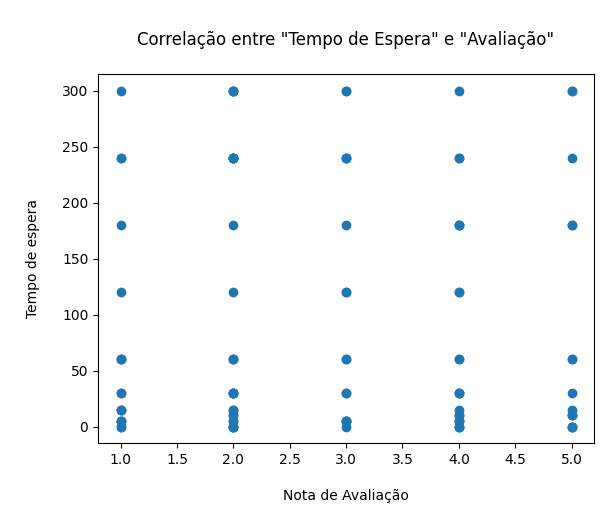

In [159]:
# correlação entre avaliação e tempo de espera

plt.scatter(df_clinica_avaliacao['nota_satisfacao'], df_clinica_avaliacao['tempo_espera'])
plt.title('\nCorrelação entre "Tempo de Espera" e "Avaliação"\n')
plt.xlabel('\nNota de Avaliação\n')
plt.ylabel('\nTempo de espera\n')
plt.show

In [160]:
df_consultas_medicos

,index,id_consulta,id_paciente,id_medico,id_clinica,especialidade_x,data_hora_agendada,data_hora_inicio,status,tempo_espera,nome,especialidade_y,tempo_medio_atendimento
0,0,1,82,15,4,Cardiologia,2023-09-27 23:46:00,2023-09-28 00:16:00,Realizada,30.0,Dr(a). Ricardo Lima,Ginecologia,54
1,1,2,18,95,14,Cardiologia,2023-09-04 09:05:00,2023-09-04 13:05:00,Realizada,240.0,Dr(a). Ricardo Costa,Urologia,56
2,2,3,55,5,4,Pediatria,2023-02-04 02:43:00,2023-02-04 02:58:00,Realizada,15.0,Dr(a). Mariana Almeida,Pediatria,39
3,3,4,78,4,72,Ortopedia,2023-03-14 09:28:00,2023-03-14 13:28:00,Realizada,240.0,Dr(a). Mariana Nascimento,Oftalmologia,18
4,4,5,58,76,36,Pediatria,2023-10-22 16:54:00,2023-10-22 16:54:00,Cancelada,0.0,Dr(a). Fernanda Pereira,Endocrinologia,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,4996,27,27,93,Pediatria,2023-03-28 04:34:00,2023-03-28 05:34:00,Cancelada,60.0,Dr(a). Juliana Oliveira,Urologia,56
4996,4996,4997,17,26,8,Cardiologia,2023-12-06 12:39:00,2023-12-06 12:54:00,Realizada,15.0,Dr(a). Ricardo Silva,Psiquiatria,48
4997,4997,4998,60,39,34,Ortopedia,2023-11-06 11:27:00,2023-11-06 11:27:00,Realizada,0.0,Dr(a). Patrícia Gomes,Psiquiatria,55
4998,4998,4999,65,7,98,Dermatologia,2023-10-07 20:19:00,2023-10-07 22:19:00,Realizada,120.0,Dr(a). Fernanda Oliveira,Endocrinologia,18


In [161]:

Analise_medico = {'medico': [],'media': [],'mediana': [],'distancia_percentual': [],'limite_inferior': [],'limite_superior': [], 'q1': [],'q3': []}

for nome_medico, grupo in df_consultas_medicos.groupby('nome'):
    print(f"\nNome: {nome_medico}")
    tempo_espera = grupo['tempo_espera'].values
    media_consulta, mediana_consulta, distancia_consulta = tendencia_central(grupo['tempo_espera'])
    outlier_lista, limite_inferior, limite_superior, q1, q3 = outliers(tempo_espera)  
    Analise_medico['medico'].append(nome_medico)
    Analise_medico['media'].append(media_consulta)    
    Analise_medico['mediana'].append(mediana_consulta)
    Analise_medico['distancia_percentual'].append(distancia_consulta)        
    Analise_medico['limite_inferior'].append(limite_inferior)
    Analise_medico['limite_superior'].append(limite_superior)
    Analise_medico['q1'].append(q1)
    Analise_medico['q3'].append(q3)

df_analise_medico = pd.DataFrame(Analise_medico)


Nome: Dr(a). André Almeida
Média: 96.99
Mediana: 60.00
Distancia: 61.65% 
Quartis
Q1: 15.00
Q2: 60.00
Q3: 180.00
Valores de corte:
Limite superior: 427.50
Limite inferior: -232.50

Nome: Dr(a). André Gomes
Média: 94.38
Mediana: 30.00
Distancia: 214.60% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Nome: Dr(a). André Lima
Média: 98.58
Mediana: 30.00
Distancia: 228.61% 
Quartis
Q1: 10.00
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Nome: Dr(a). André Nascimento
Média: 93.07
Mediana: 45.00
Distancia: 106.82% 
Quartis
Q1: 10.00
Q2: 45.00
Q3: 180.00
Valores de corte:
Limite superior: 435.00
Limite inferior: -245.00

Nome: Dr(a). André Oliveira
Média: 97.41
Mediana: 30.00
Distancia: 224.70% 
Quartis
Q1: 6.25
Q2: 30.00
Q3: 180.00
Valores de corte:
Limite superior: 440.62
Limite inferior: -254.38

Nome: Dr(a). André Pereira
Média: 106.75
Mediana: 45.00
Distancia: 137.22% 
Quartis
Q1: 13.7

In [162]:
df_analise_medico


,medico,media,mediana,distancia_percentual,limite_inferior,limite_superior,q1,q3
0,Dr(a). André Almeida,96.992754,60.0,61.654589,-232.500,427.500,15.00,180.0
1,Dr(a). André Gomes,94.381443,30.0,214.604811,-245.000,435.000,10.00,180.0
2,Dr(a). André Lima,98.583333,30.0,228.611111,-245.000,435.000,10.00,180.0
3,Dr(a). André Nascimento,93.068182,45.0,106.818182,-245.000,435.000,10.00,180.0
4,Dr(a). André Oliveira,97.409639,30.0,224.698795,-254.375,440.625,6.25,180.0
5,Dr(a). André Pereira,106.750000,45.0,137.222222,-235.625,429.375,13.75,180.0
6,Dr(a). André Souza,104.250000,60.0,73.750000,-335.000,585.000,10.00,240.0
7,Dr(a). Camila Almeida,96.755319,30.0,222.517730,-245.000,435.000,10.00,180.0
8,Dr(a). Camila Costa,89.178571,30.0,197.261905,-245.000,435.000,10.00,180.0
9,Dr(a). Camila Gomes,109.907407,45.0,144.238683,-335.000,585.000,10.00,240.0


In [163]:
# DESCOBRIR POR QUE A MEDIA = MEDIANA E APLICAR ESSA FORMULA NA CLINICA E ESPECIALIDADE